In [1]:
import psycopg2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from utils.utils import get_table_data

In [2]:
saved_songs = get_table_data(table_name="temp_saved_songs")
audio_features = get_table_data(table_name="temp_audio_features")

In [3]:
df_songs = pd.DataFrame.from_records(saved_songs)
print(df_songs.shape)
df_songs.head()

(4732, 9)


,track_id,track_name,main_artist,featured_artists,track_duration_ms,album_name,album_id,album_release_date,added_at
0,3ESsjKqrj3M79I8sSZieK3,aisatsana [102],Aphex Twin,None,321880,Syro,6oRuinkJdTge4hpTuClEF8,2014-09-19,2020-09-10 12:59:24+00:00
1,2MZSXhq4XDJWu6coGoXX1V,Avril 14th,Aphex Twin,None,125520,Drukqs,1maoQPAmw44bbkNOxKlwsx,2001-10-22,2020-09-10 12:54:10+00:00
2,3OdxFkz4zP6tx1t9zSdMCt,Radiator (Original Mix) - Peel Session,Aphex Twin,None,390535,Peel Session 2,2AmoY6ypezs0oIMMtlK80M,2019-11-15,2020-09-10 12:43:13+00:00
3,3w9QYN4jMI2pi92WhBYMl7,p-string - Peel Session,Aphex Twin,None,422279,Peel Session 2,2AmoY6ypezs0oIMMtlK80M,2019-11-15,2020-09-10 12:43:08+00:00
4,2Bc4llhjJBW77I552RgA3L,#3,Aphex Twin,None,464293,Selected Ambient Works Volume II,17vHPMmoxN5B8cdhCDeMTe,1994-03-07,2020-09-10 12:29:52+00:00


In [4]:
main_artists = df_songs["main_artist"].value_counts()

_Q:_ Hvordan unpacke featured_artists-kolonnen for å inkludere dem også?
A: `.explode()` og `.value_counts()`

In [5]:
features = df_songs["featured_artists"].explode().value_counts()
features = features.rename(index={"Joey Bada$$": "Joey Badass"})

In [6]:
artist_dist = main_artists.add(features, fill_value=0).astype(int).sort_values(ascending=False)
artist_dist = artist_dist.to_frame()
artist_dist = artist_dist.reset_index().rename({ "index": "artist" }, axis=1)
artist_dist

,artist,count
0,Bladee,122
1,Flume,70
2,BROCKHAMPTON,64
3,Playboi Carti,58
4,Yung Lean,57
...,...,...
2183,KMB,1
2184,KILLCLOVE,1
2185,KAYTRAMINÉ,1
2186,KAVARI,1


In [7]:
# artist_dist = artist_dist[artist_dist["count"] > 20]
artist_dist

,artist,count
0,Bladee,122
1,Flume,70
2,BROCKHAMPTON,64
3,Playboi Carti,58
4,Yung Lean,57
...,...,...
2183,KMB,1
2184,KILLCLOVE,1
2185,KAYTRAMINÉ,1
2186,KAVARI,1


In [8]:
# fig, ax = plt.subplots(figsize=(7,5 ))
# ax.bar(artist_dist.artist, artist_dist["count"])
# ax.tick_params(labelrotation=90, )
# plt.xticks(fontsize=6)
# plt.show()

## Joining saved songs and audio features

In [9]:
df_af = pd.DataFrame.from_records(audio_features)
df_af.head()

,reccobeats_id,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,track_id,main_artist,track_name
0,7da4d702-4cab-44e4-8cde-b13dcebaa6fe,0.1300,0.318,0.766,0.166000,9,0.3400,-6.302,0,0.0412,128.378,0.195,7HuaFNJNNgLmk1WTSigmhi,BROCKHAMPTON,DEARLY DEPARTED
1,8187379a-4da5-4a1d-ac2f-219cc74e82c2,0.4430,0.862,0.670,0.000112,4,0.2060,-13.050,0,0.1850,115.115,0.437,06lFoPIxJEI0vpFgn2Cgy6,Allem Iversom,Stuck
2,9c54f666-5233-442d-a1d7-0c34415e79d0,0.5460,0.677,0.781,0.000000,0,0.1820,-5.722,1,0.1980,135.047,0.529,3B0K8G7WESjdKxQvVMByR9,Charli xcx,Click (feat. Kim Petras and Tommy Cash)
3,eedcb9cd-7c67-435d-888b-9e91a578e06d,0.0933,0.690,0.734,0.005310,1,0.1370,-6.377,1,0.0316,124.033,0.459,18uOcUO5mNEYHHigeXPgQM,Slayyyter,Mine
4,caa38e7c-c00f-432a-8a70-a6640c63f542,0.0209,0.594,0.721,0.000009,2,0.0879,-7.812,1,0.0957,128.942,0.253,6ie2Bw3xLj2JcGowOlcMhb,Lorde,Green Light


In [10]:
df_songs.head()

,track_id,track_name,main_artist,featured_artists,track_duration_ms,album_name,album_id,album_release_date,added_at
0,3ESsjKqrj3M79I8sSZieK3,aisatsana [102],Aphex Twin,None,321880,Syro,6oRuinkJdTge4hpTuClEF8,2014-09-19,2020-09-10 12:59:24+00:00
1,2MZSXhq4XDJWu6coGoXX1V,Avril 14th,Aphex Twin,None,125520,Drukqs,1maoQPAmw44bbkNOxKlwsx,2001-10-22,2020-09-10 12:54:10+00:00
2,3OdxFkz4zP6tx1t9zSdMCt,Radiator (Original Mix) - Peel Session,Aphex Twin,None,390535,Peel Session 2,2AmoY6ypezs0oIMMtlK80M,2019-11-15,2020-09-10 12:43:13+00:00
3,3w9QYN4jMI2pi92WhBYMl7,p-string - Peel Session,Aphex Twin,None,422279,Peel Session 2,2AmoY6ypezs0oIMMtlK80M,2019-11-15,2020-09-10 12:43:08+00:00
4,2Bc4llhjJBW77I552RgA3L,#3,Aphex Twin,None,464293,Selected Ambient Works Volume II,17vHPMmoxN5B8cdhCDeMTe,1994-03-07,2020-09-10 12:29:52+00:00


In [11]:
df_af = df_af[['reccobeats_id', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence', 'track_id']]
df_merged = df_songs.merge(df_af,"right","track_id")

In [12]:
df_merged.sort_values("album_release_date", ascending=False)

,track_id,track_name,main_artist,featured_artists,track_duration_ms,album_name,album_id,album_release_date,added_at,reccobeats_id,...,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
404,7vqhdTChjBagZe19k5OMlA,You Thought,Mall Grab,None,273764,New York,0XkAxtxrz3kFobDhuuwFiR,2025-10-30,2025-10-31 07:24:07+00:00,dbc405ad-436f-4d04-a8f5-4b9f31d36ba0,...,0.563,0.8820,0.94400,6,0.0682,-7.827,1,0.0320,136.013,0.559
403,5gYu4EYgM8SDIzfTZ2IWYC,dance 2,Oklou,None,291172,choke enough (Deluxe),2G7CqmCYcpF1GtpXx5ttRO,2025-10-30,2025-10-31 07:27:42+00:00,81510185-915a-4b12-9538-6162adb2e171,...,0.677,0.7830,0.00226,2,0.1160,-10.167,0,0.0390,115.010,0.426
1306,33PR2Dx8NeW09xC5VEvuIR,Advent,Bladee,[Yung Lean],185396,Evil World,6IwwLUU9bCQKDrAnSRuYQB,2025-10-10,2025-10-10 16:16:53+00:00,e26112c8-6cbe-4c4f-833a-6302fcfb805d,...,0.715,0.7190,0.00091,0,0.2170,-6.422,1,0.0670,147.990,0.578
402,70EG3KoKRu3jvsBlFVZYkJ,I Like It Like That,Fcukers,None,173772,I Like It Like That,4fSeCHsY6f1o4ccUxC7FRT,2025-10-07,2025-10-24 17:51:21+00:00,2a9a89dc-fb8b-4495-9985-2b410fe1bba4,...,0.792,0.8150,0.04630,0,0.3150,-6.420,1,0.0500,136.957,0.899
93,36cpvfoFRtt54qelBQ0Qkl,UNCONDITIONAL,NOTION,[nate sib],181294,UNCONDITIONAL,0aOuVsBkVR8F2l9loZb07R,2025-09-12,2025-09-12 18:34:45+00:00,f8e686f0-73f6-497a-81dd-72b962d28841,...,0.730,0.8160,0.05830,7,0.1680,-5.645,0,0.0943,138.989,0.172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,5nhbNC0tZnWIvQYwwSKlPf,Detour Ahead (take 1) - Alternate Take,Bill Evans Trio,None,435173,Waltz For Debby (Original Jazz Classics Remast...,0MjlKhtsyax9HSWNkYaWM2,1961-01-01,2022-01-23 14:48:10+00:00,fefe7d95-d0d6-4b0b-ba9e-c565f6954827,...,0.423,0.1770,0.88900,0,0.7220,-22.902,1,0.0326,130.140,0.174
302,4vLYewWIvqHfKtJDk8c8tq,"So What (feat. John Coltrane, Cannonball Adder...",Miles Davis,"[John Coltrane, Cannonball Adderley, Bill Evans]",562640,Kind Of Blue (Legacy Edition),4sb0eMpDn3upAFfyi4q2rw,1959-08-17,2022-03-27 13:20:37+00:00,f11cdf7e-300f-4584-b180-f1eda114aa72,...,0.532,0.1510,0.00136,0,0.1160,-17.266,1,0.0376,136.759,0.211
2533,78ntGe4xyecZHg9exQWwK6,Blue And Sentimental,Oscar Peterson,None,146093,Oscar Peterson Plays Count Basie,7ETDHJ9yletBCxNx0ipr1x,1956-01-01,2022-10-21 22:50:51+00:00,8a767835-e2c2-45e9-bb53-f507142b6f0f,...,0.551,0.1140,0.87400,3,0.1410,-24.780,0,0.0451,70.141,0.124
2532,0kuEPcGu1wcMQBvVtYUucq,Blue Moon,Oscar Peterson,None,157506,Pastel Moods,36pZgk4qSJroIPoGXxC75U,1956-01-01,2022-10-21 22:47:52+00:00,e9d46a9a-1409-4559-8400-9c40037690a6,...,0.571,0.0601,0.94100,10,0.1200,-26.205,1,0.0412,73.888,0.229


In [13]:
df_filtered = df_merged[df_merged.groupby("main_artist")["main_artist"].transform("size") > 5]
df_filtered.shape

(1333, 21)

In [14]:
df_mean_af = df_filtered.groupby("main_artist")[['acousticness', 'danceability',
                                               'energy', 'instrumentalness', 
                                               'key', 
                                               'speechiness', 'tempo', 'valence'
                                               ]].agg("mean")

In [15]:
feature_of_interest = "speechiness"
df_mean_af[[feature_of_interest]].sort_values(feature_of_interest, ascending=False)

,speechiness
main_artist,
chromonicci,0.463333
shamana,0.365429
Chuck Sutton,0.323333
Smino,0.315880
J.Robb,0.276886
...,...
The Strokes,0.033222
Alex G,0.032433
ML Buch,0.032150


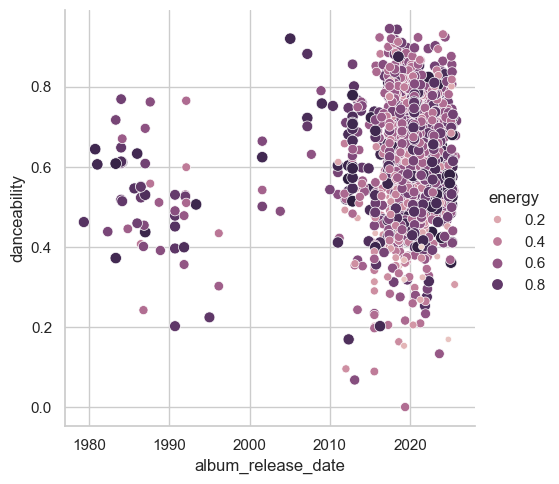

In [16]:
plt.show()
sns.set_theme(style="whitegrid")
sns.relplot(data=df_filtered, x="album_release_date", y="danceability", size="energy", hue="energy")
plt.show()

In [17]:
df_filtered.sort_values("danceability", ascending=True)

,track_id,track_name,main_artist,featured_artists,track_duration_ms,album_name,album_id,album_release_date,added_at,reccobeats_id,...,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
1275,5e4LIAQI0bClLazNf2gZV0,EXACTLY WHAT YOU RUN FROM YOU END UP CHASING,"Tyler, The Creator",None,14626,IGOR,5zi7WsKlIiUXv09tbGLKsE,2019-05-17,2019-05-17 05:15:37+00:00,6a795a63-b6e6-4ff0-8cdd-c6044a068ab6,...,0.0000,0.478,0.000000,11,0.3350,-16.569,0,0.0000,0.000,0.0000
2839,6MGkqYuQhx5AGMINNj5ZRU,who sees you,my bloody valentine,None,372213,m b v,2SlSnUYW5bgtdWXVymv18a,2013-02-02,2022-12-18 13:25:39+00:00,ed5ad5d8-b57d-4f44-ab92-32bd630fe97d,...,0.0676,0.659,0.886000,6,0.1940,-11.255,1,0.0595,76.184,0.0931
1203,4Jvnu442uBEIxEeZgOt1mW,Crying,Teen Suicide,None,267739,Bad Vibes Forever,3FcN9VjRHVC8E7QWQ9ZaTq,2015-07-17,2022-03-07 21:49:28+00:00,2e59557c-8033-4bac-a8fa-f79cc63edb21,...,0.0888,0.400,0.941000,4,0.1440,-7.882,1,0.0364,183.485,0.1140
1039,6EjcjCQkzOYG7Xxvza1RBo,Child I Will Hurt You,Crystal Castles,None,212997,(III),2KYBzzK8L9yvBe0k5GeoD8,2012-01-01,2024-03-30 17:44:31+00:00,8193dc4a-9017-4237-a0f2-6e305e14b3b5,...,0.0954,0.308,0.890000,7,0.1390,-8.212,1,0.0359,70.599,0.0377
2359,05SEi2EuY93D6UHHUSNZGc,Lips,Jane Remover,None,310773,Lips,7Kvgk3FSRAKFKVZrvhNjmy,2023-08-23,2023-08-25 12:17:15+00:00,a9a2ad07-a739-481f-8a7c-b5809ebb0acb,...,0.1330,0.593,0.000619,1,0.0860,-7.039,1,0.0461,76.744,0.1330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,4CYTQpr2jc4uBScYvpEK2w,Beno!,Playboi Carti,None,153333,Whole Lotta Red,2QRedhP5RmKJiJ1i8VgDGR,2020-12-25,2020-12-25 09:32:32+00:00,37e20b35-bb77-4784-88e4-68e3fcfbdda8,...,0.9230,0.562,0.000000,1,0.0726,-7.357,1,0.3040,144.067,0.4990
169,4BfE914TITP5y8lcfdm9HD,Limosina,1tbsp,[cherry chola],123901,Limosina,3bgPVDYyNQYmGDCARiVH0O,2024-05-09,2024-05-10 12:46:18+00:00,2e73d78a-83ff-4d8a-906f-c2f3d4cd7348,...,0.9240,0.631,0.052000,6,0.1190,-6.131,1,0.2040,140.016,0.9030
1968,6s02C7oN8eAbhDnHQ00zE2,New Shoes,Smerz,[Allina],124667,Allina,2SYF214s2NIu7xfT41eHMx,2024-02-01,2025-03-28 05:57:18+00:00,326d966b-7f5b-4ccc-a41e-c6896ffdecc8,...,0.9310,0.437,0.003430,7,0.0868,-9.393,1,0.2860,127.006,0.5870
1246,5pHJv0bgNsT9nPoK2BjNBn,No Time (feat. Gunna),Playboi Carti,[Gunna],219453,Die Lit,7dAm8ShwJLFm9SaJ6Yc58O,2018-05-11,2019-11-06 15:09:32+00:00,946d5070-4630-4c98-9b99-27f6124f03ae,...,0.9430,0.763,0.000018,5,0.1140,-5.568,0,0.1580,139.969,0.2250


In [18]:
df_filtered["release_year"] = df_filtered.album_release_date.apply(lambda x: x.year)

/var/folders/3z/fbv_cnz175v2v_9cqnh_3t5r0000gn/T/ipykernel_5601/2203094819.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["release_year"] = df_filtered.album_release_date.apply(lambda x: x.year)


Arrangere artister etter gjennomsnittlig audio feautre

In [19]:
df_merged.head()

,track_id,track_name,main_artist,featured_artists,track_duration_ms,album_name,album_id,album_release_date,added_at,reccobeats_id,...,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,7HuaFNJNNgLmk1WTSigmhi,DEARLY DEPARTED,BROCKHAMPTON,None,280004,GINGER,1jToVugwBEzcak8gJNZG2f,2019-08-23,2019-09-21 10:56:09+00:00,7da4d702-4cab-44e4-8cde-b13dcebaa6fe,...,0.318,0.766,0.166000,9,0.3400,-6.302,0,0.0412,128.378,0.195
1,06lFoPIxJEI0vpFgn2Cgy6,Stuck,Allem Iversom,None,250434,Stuck,5scmOmAvdyKMQqMiKmdSpK,2019-09-26,2019-09-27 10:49:08+00:00,8187379a-4da5-4a1d-ac2f-219cc74e82c2,...,0.862,0.670,0.000112,4,0.2060,-13.050,0,0.1850,115.115,0.437
2,3B0K8G7WESjdKxQvVMByR9,Click (feat. Kim Petras and Tommy Cash),Charli xcx,"[Kim Petras, Tommy Cash]",233293,Charli,386IqvSuljaZsMjwDGGdLj,2019-09-13,2019-09-19 07:23:53+00:00,9c54f666-5233-442d-a1d7-0c34415e79d0,...,0.677,0.781,0.000000,0,0.1820,-5.722,1,0.1980,135.047,0.529
3,18uOcUO5mNEYHHigeXPgQM,Mine,Slayyyter,None,159013,Mine,3SQr5VHmYRkAGGMTCBbbnP,2019-05-03,2019-09-18 15:22:00+00:00,eedcb9cd-7c67-435d-888b-9e91a578e06d,...,0.690,0.734,0.005310,1,0.1370,-6.377,1,0.0316,124.033,0.459
4,6ie2Bw3xLj2JcGowOlcMhb,Green Light,Lorde,None,234652,Melodrama,2B87zXm9bOWvAJdkJBTpzF,2017-06-16,2019-09-22 19:43:04+00:00,caa38e7c-c00f-432a-8a70-a6640c63f542,...,0.594,0.721,0.000009,2,0.0879,-7.812,1,0.0957,128.942,0.253


In [20]:
df_filtered = df_merged[df_merged.groupby("main_artist")["main_artist"].transform("size") > 3] # Must have saved at least 3 tracks with the main artist in question

feature_of_interest = "danceability"
avg_of_features = df_filtered.groupby("main_artist").mean(numeric_only=True)
avg_of_features[feature_of_interest].sort_values(ascending=False)

main_artist
Rich Brian             0.841455
1tbsp                  0.838167
COMPUTER DATA          0.832500
bbno$                  0.804200
Logic                  0.796500
                         ...   
Julia Brown            0.384533
Phoebe Bridgers        0.333200
Teen Suicide           0.321180
Sematary               0.302400
my bloody valentine    0.289433
Name: danceability, Length: 187, dtype: float64

Controls:
- Choose feature
- Sort in ascending/descending order

In [21]:
min_max_feature = df_filtered[["main_artist", "track_name", feature_of_interest ]].sort_values(by=feature_of_interest, ascending=False)
min_max_feature

,main_artist,track_name,danceability
2793,BROCKHAMPTON,FACE,0.9450
1246,Playboi Carti,No Time (feat. Gunna),0.9430
180,COMPUTER DATA,Healing,0.9420
1968,Smerz,New Shoes,0.9310
1625,bbno$,nursery,0.9260
...,...,...,...
2359,Jane Remover,Lips,0.1330
1039,Crystal Castles,Child I Will Hurt You,0.0954
1203,Teen Suicide,Crying,0.0888
2839,my bloody valentine,who sees you,0.0676


Controls:
- Choose decade(s)
- Choose feature
- Sort in ascending/descending order

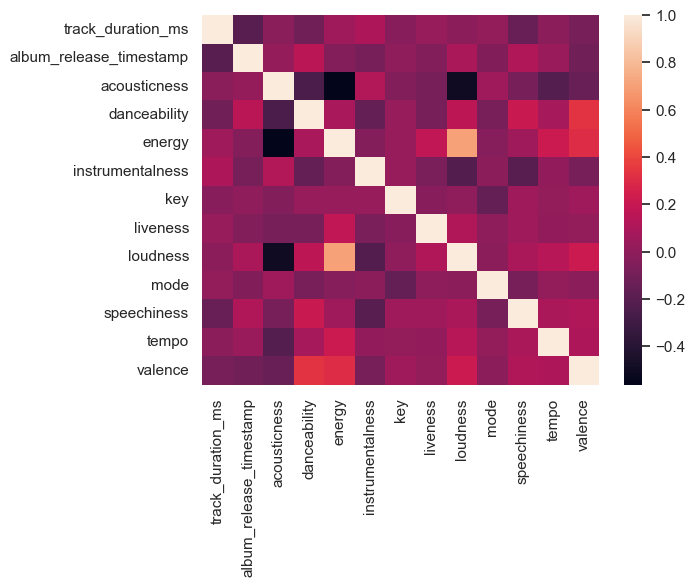

In [22]:
df_filtered_c = df_filtered.copy()
df_filtered_c["album_release_timestamp"] = df_filtered_c["album_release_date"].apply(lambda x: x.strftime("%s"))
sns.heatmap(df_filtered_c[['track_duration_ms', 
                         'album_release_timestamp', # convert to UNIX time?
                         'acousticness',
'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness',
'mode', 'speechiness', 'tempo', 'valence']].corr())
plt.show()

In [23]:
df_filtered_cm = df_filtered_c.merge(artist_dist, how="left", left_on="main_artist", right_on="artist")
df_filtered_cm["album_release_year"] = df_filtered_cm["album_release_date"].apply(lambda x: x.year)

In [24]:
df_filtered_cm.head()

,track_id,track_name,main_artist,featured_artists,track_duration_ms,album_name,album_id,album_release_date,added_at,reccobeats_id,...,liveness,loudness,mode,speechiness,tempo,valence,album_release_timestamp,artist,count,album_release_year
0,7HuaFNJNNgLmk1WTSigmhi,DEARLY DEPARTED,BROCKHAMPTON,None,280004,GINGER,1jToVugwBEzcak8gJNZG2f,2019-08-23,2019-09-21 10:56:09+00:00,7da4d702-4cab-44e4-8cde-b13dcebaa6fe,...,0.3400,-6.302,0,0.0412,128.378,0.195,1566511200,BROCKHAMPTON,64,2019
1,3B0K8G7WESjdKxQvVMByR9,Click (feat. Kim Petras and Tommy Cash),Charli xcx,"[Kim Petras, Tommy Cash]",233293,Charli,386IqvSuljaZsMjwDGGdLj,2019-09-13,2019-09-19 07:23:53+00:00,9c54f666-5233-442d-a1d7-0c34415e79d0,...,0.1820,-5.722,1,0.1980,135.047,0.529,1568325600,Charli xcx,34,2019
2,6ie2Bw3xLj2JcGowOlcMhb,Green Light,Lorde,None,234652,Melodrama,2B87zXm9bOWvAJdkJBTpzF,2017-06-16,2019-09-22 19:43:04+00:00,caa38e7c-c00f-432a-8a70-a6640c63f542,...,0.0879,-7.812,1,0.0957,128.942,0.253,1497564000,Lorde,17,2017
3,3WGJSY8JaGliVIJyMig5aS,1999,Charli xcx,[Troye Sivan],189200,Charli,386IqvSuljaZsMjwDGGdLj,2019-09-13,2019-09-19 07:20:14+00:00,0d2a9a8e-41f3-469b-947d-cef1d323cb77,...,0.1400,-4.686,1,0.0340,124.016,0.625,1568325600,Charli xcx,34,2019
4,694vvR5o19xHPhhJ5QdLN7,NO HALO,BROCKHAMPTON,None,259750,GINGER,1jToVugwBEzcak8gJNZG2f,2019-08-23,2019-09-21 10:56:17+00:00,9920f4e1-7a96-48e6-b8ac-a0cc1dac16e6,...,0.0695,-7.034,1,0.0709,165.192,0.470,1566511200,BROCKHAMPTON,64,2019


In [25]:
import plotly.express as px
from datetime import date

px.scatter(
    df_filtered_cm[df_filtered_cm["album_release_date"] > date(year=2020, month=1, day=1)].query("count > 5"), 
    "album_release_date", 
    "danceability", 
    size="energy", 
    color="count",
    hover_data=[ "main_artist", "track_name" ],
    )

# Suggestion, color = artist frequency in library

Controls:
- Set date range
- Filter w.r.t. artist frequency
- Choose y-axis as another audio feature
- Threshold energy level: greater than, less than set value?